Import libraries

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt 

Go throu Scraperapi so your IP is not blocked

In [3]:
forex_data = []
 
payload = {
   'api_key': '72e8dc0427bc3fc4cee19eb212e8328e',
   'country_code': 'us',
   'url': 'https://finance.yahoo.com/currencies'
}
 
response = requests.get('https://api.scraperapi.com', params=payload)

veryfing connection

In [4]:
print(response.status_code)

200


In [9]:
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('tbody')
all_currencies = table.select('tr')
for currency in all_currencies:
   name =  currency.find('td', attrs={'aria-label': 'Name'}).text
   last_price = currency.select_one('td[aria-label="Last Price"]').text
   change = currency.find('td', attrs={'aria-label': 'Change'}).text
   percentage = currency.select_one('td[aria-label="% Change"] > fin-streamer > span').text
   forex_data.append({
       'Currency': name,
       'Last Price': last_price,
       'Change': change,
       '% Change': percentage
   })
 
df = pd.DataFrame(forex_data)
df.to_csv('forex.csv', index=False)

Reading the excel file into Pandas DataFrame

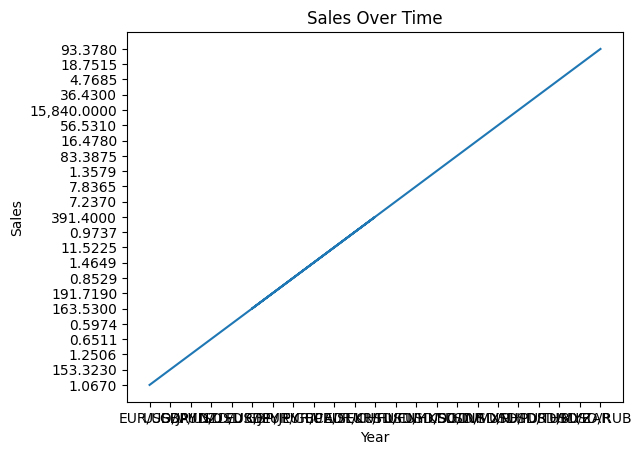

In [12]:
plt.plot(df['Currency'], df['Last Price']) 
plt.xlabel("Year") 
plt.ylabel("Sales") 
plt.title("Sales Over Time") 
plt.show() 